<a href="https://colab.research.google.com/github/kachidiniru/Projects/blob/main/Onyeka_Git_Copy_of_Recruitment_Analysis_Stackoverflow_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# “How to recruit Data Scientists?” - Recruitment Analysis

## **Description:**

You are working for a major tech company in Berlin as a Junior Data Analyst. The tech company wants to grow and hire for their new Data Science team. The HR department of the company asks you to create an analysis on how to recruit for the new data science team.

You take the Stackoverflow Survey to analyze the data science market.

The company wants to recruit people who have Python and SQL skills.

**Please answer the following questions:**
- How many Data Analyst / Scientists are in the survey?
- What profile do these Data Analyst / Scientist have? (Background, education, work experience)
- What is the salary range for such Data Analysts / Scientists?
- Please share any other insight you find that would be relevant for deciding how to recruit Data Analysts/Scientist.

## Resources:

* [About the Survey ](https://insights.stackoverflow.com/survey)



In [1]:
import requests, zipfile, io
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import gmean
from scipy.stats import iqr

In [2]:
# Link to Survey Data
zip_file_url = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip"

In [3]:
# Download Survey Data into Google Colab
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

In [4]:
# Load Survey Data
survey = pd.read_csv("/content/survey_results_public.csv")

To ensure all the columns are visible

In [7]:
survey.head(5)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [8]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [9]:
survey.shape

(73268, 79)

In [10]:
survey.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

To know the length of each important attribute

In [11]:
survey[["CompTotal","ResponseId","MainBranch","Employment","EdLevel","LanguageHaveWorkedWith","DevType","WorkExp"]].count()

CompTotal                 38422
ResponseId                73268
MainBranch                73268
Employment                71709
EdLevel                   71571
LanguageHaveWorkedWith    70975
DevType                   61302
WorkExp                   36769
dtype: int64

To ascertain NANs in the attributes

In [12]:
survey[["CompTotal","ResponseId","MainBranch","Employment","EdLevel","LanguageHaveWorkedWith","DevType","WorkExp"]].isna().sum()

CompTotal                 34846
ResponseId                    0
MainBranch                    0
Employment                 1559
EdLevel                    1697
LanguageHaveWorkedWith     2293
DevType                   11966
WorkExp                   36499
dtype: int64

To drop the NAN on the columns useful for the analsis

In [13]:
new_surv = survey.dropna(subset= ["CompTotal","ResponseId","YearsCode","MainBranch","Employment","EdLevel","LanguageHaveWorkedWith","DevType","WorkExp","CodingActivities"])
new_surv.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
11,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,...,30-60 minutes a day,60-120 minutes a day,Just right,Innersource initiative;DevOps function;Microse...,Yes,Yes,No,Too short,Easy,194400.0
12,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,...,30-60 minutes a day,Less than 15 minutes a day,Somewhat short,DevOps function;Microservices,Yes,No,Yes,Appropriate in length,Easy,65000.0
14,15,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;Video-based O...,NaN,11,...,30-60 minutes a day,30-60 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,No,Yes,Yes,Appropriate in length,Easy,110000.0


To find the number of Data scientists / Data analysts in the survey

In [14]:
df = new_surv[(new_surv["DevType"].str.contains("Data scientist or machine learning specialist")) | (new_surv["DevType"].str.contains("Data or business analyst "))]
df["DevType"].value_counts().head(10)

Data scientist or machine learning specialist                                            244
Data scientist or machine learning specialist;Developer, back-end                         57
Data scientist or machine learning specialist;Data or business analyst                    57
Data scientist or machine learning specialist;Engineer, data                              48
Data scientist or machine learning specialist;Developer, full-stack                       31
Data scientist or machine learning specialist;Engineer, data;Developer, back-end          30
Data scientist or machine learning specialist;Academic researcher;Scientist               28
Data scientist or machine learning specialist;Academic researcher                         24
Data scientist or machine learning specialist;Engineer, data;Data or business analyst     19
Data scientist or machine learning specialist;Scientist                                   12
Name: DevType, dtype: int64

In [15]:
len(df)
## The number od Data Scientists /Data analsts is 1428

1428

In [16]:
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
41,42,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,3,...,30-60 minutes a day,15-30 minutes a day,Somewhat short,NaN,NaN,Yes,Yes,Appropriate in length,Neither easy nor difficult,68160.0
85,86,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,...,60-120 minutes a day,15-30 minutes a day,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0
107,108,I am a developer by profession,"Employed, full-time",Full in-person,I don’t code outside of work,Some college/university study without earning ...,"School (i.e., University, College, etc);Other ...",NaN,NaN,7,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,None of these,No,No,Yes,Appropriate in length,Neither easy nor difficult,35000.0


In [18]:
#df["DevType"].value_counts().plot(kind="bar")

What profile do these Data Analyst / Scientist have? (Background, education, work experience)

In [19]:
df[["DevType","MainBranch","EdLevel","WorkExp","ResponseId"]].value_counts(ascending = False)

DevType                                                                                                                                                       MainBranch                                                                     EdLevel                                          WorkExp  ResponseId
Data scientist or machine learning specialist                                                                                                                 I am a developer by profession                                                 Bachelor’s degree (B.A., B.S., B.Eng., etc.)     1.0      21506         1
Data scientist or machine learning specialist;Developer, full-stack;Developer, embedded applications or devices                                               I am a developer by profession                                                 Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  5.0      67273         1
Data scientist or machine learning specialist;Developer, full-stack;Engi

Text(0, 0.5, 'values')

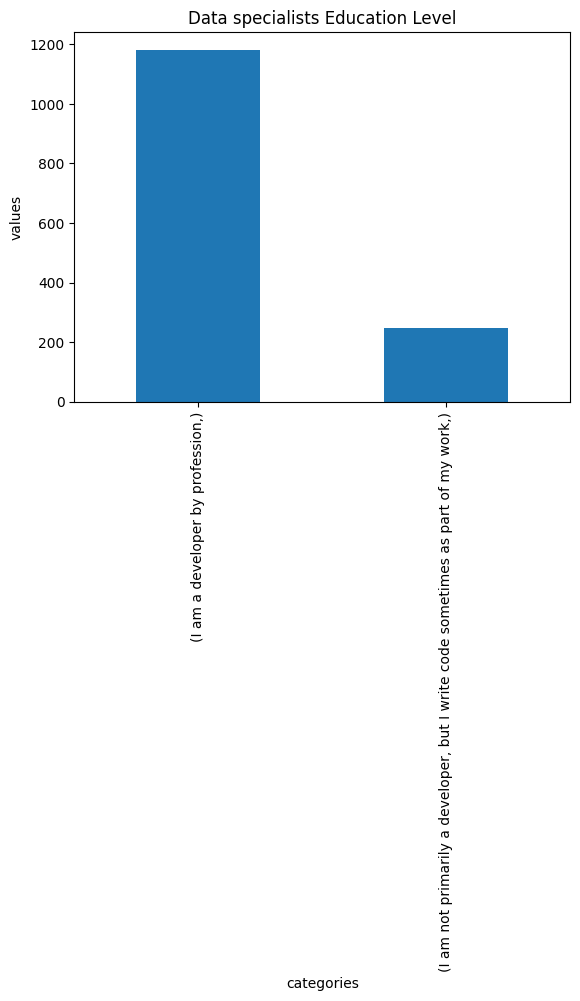

In [20]:
df[["MainBranch"]].value_counts().plot(kind="bar")
plt.title('Data specialists Education Level')
plt.xlabel('categories')
plt.ylabel('values')


In [21]:
df[["WorkExp"]].max()


WorkExp    50.0
dtype: float64

In [22]:
df[["WorkExp"]].mean()

WorkExp    10.39986
dtype: float64

In [23]:
import statistics as st

In [24]:
st.median(df["WorkExp"])

8.0

In [25]:
st.mean(df["WorkExp"])

10.39985994397759

In [26]:
st.mode(df["WorkExp"])

3.0

In [27]:
print(df["WorkExp"].min())

0.0


<ipython-input-30-00b9eb4f2f78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["WorkExp"], kde = False, color = "g")


Text(0.5, 1.0, 'Histogram for Data specialists work experience')

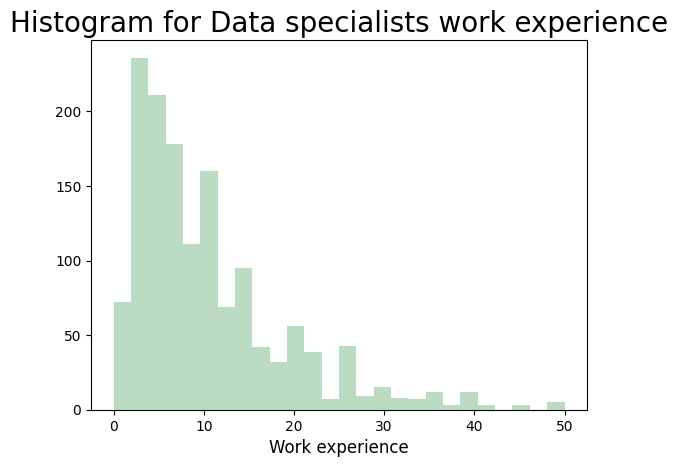

In [30]:
sn.set_color_codes()
sn.distplot(df["WorkExp"], kde = False, color = "g")

plt.xlabel("Work experience", fontsize= 12)
plt.title("Histogram for Data specialists work experience", fontsize= 20)

In [31]:
df[["EdLevel"]].value_counts()

EdLevel                                                                           
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       649
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          407
Other doctoral degree (Ph.D., Ed.D., etc.)                                            245
Some college/university study without earning a degree                                 70
Professional degree (JD, MD, etc.)                                                     19
Associate degree (A.A., A.S., etc.)                                                    14
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     13
Primary/elementary school                                                               8
Something else                                                                          3
dtype: int64

In [32]:
df_z = df[(df["EdLevel"]=="Master’s degree (M.A., M.S., M.Eng., MBA, etc.)") | (df["EdLevel"]=="Professional degree (JD, MD, etc.)")
|(df["EdLevel"]=="Other doctoral degree (Ph.D., Ed.D., etc.)")|((df["EdLevel"] == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)")
& (df["Employment"]=="Employed, full-time") & (df["MainBranch"]=="I am a developer by profession")
& df["DatabaseHaveWorkedWith"].str.contains("MySQL") & df["DatabaseHaveWorkedWith"].str.contains("PostgresSQL") &
(df["WorkExp"]>=10)) & df["LanguageHaveWorkedWith"].str.contains("SQL") & df["LanguageHaveWorkedWith"].str.contains("Python")]

In [33]:
df_z = df_z.reset_index(drop = True)
print(len(df_z))
df_z.head(3)

913


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,168,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,7,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,DevOps function;Developer portal or other cent...,Yes,No,Yes,Appropriate in length,Neither easy nor difficult,54025.0
1,203,I am a developer by profession,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,9,...,60-120 minutes a day,30-60 minutes a day,Somewhat long,None of these,No,Yes,Yes,Appropriate in length,Easy,53322.0
2,297,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc)",NaN,NaN,12,...,NaN,30-60 minutes a day,Somewhat long,DevOps function;Developer portal or other cent...,Yes,Yes,No,Appropriate in length,Easy,70276.0


To Ascertain the number of data specialists who uses Python and SQL

In [34]:
df_5 = df[(df["LanguageHaveWorkedWith"].str.contains("Python")) & (df["LanguageHaveWorkedWith"].str.contains("SQL"))]
df_5.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
41,42,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,3,...,30-60 minutes a day,15-30 minutes a day,Somewhat short,NaN,NaN,Yes,Yes,Appropriate in length,Neither easy nor difficult,68160.0
85,86,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,...,60-120 minutes a day,15-30 minutes a day,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0
107,108,I am a developer by profession,"Employed, full-time",Full in-person,I don’t code outside of work,Some college/university study without earning ...,"School (i.e., University, College, etc);Other ...",NaN,NaN,7,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,None of these,No,No,Yes,Appropriate in length,Neither easy nor difficult,35000.0


In [35]:
print(len(df_5["LanguageHaveWorkedWith"]))

774


salary range


In [36]:
iqr(df["CompTotal"])

138000.0

In [37]:
np.percentile(df["CompTotal"], 25)


42000.0

In [38]:
np.percentile(df["CompTotal"], 75)


180000.0

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = [8,6]

Text(0, 0.5, 'values')

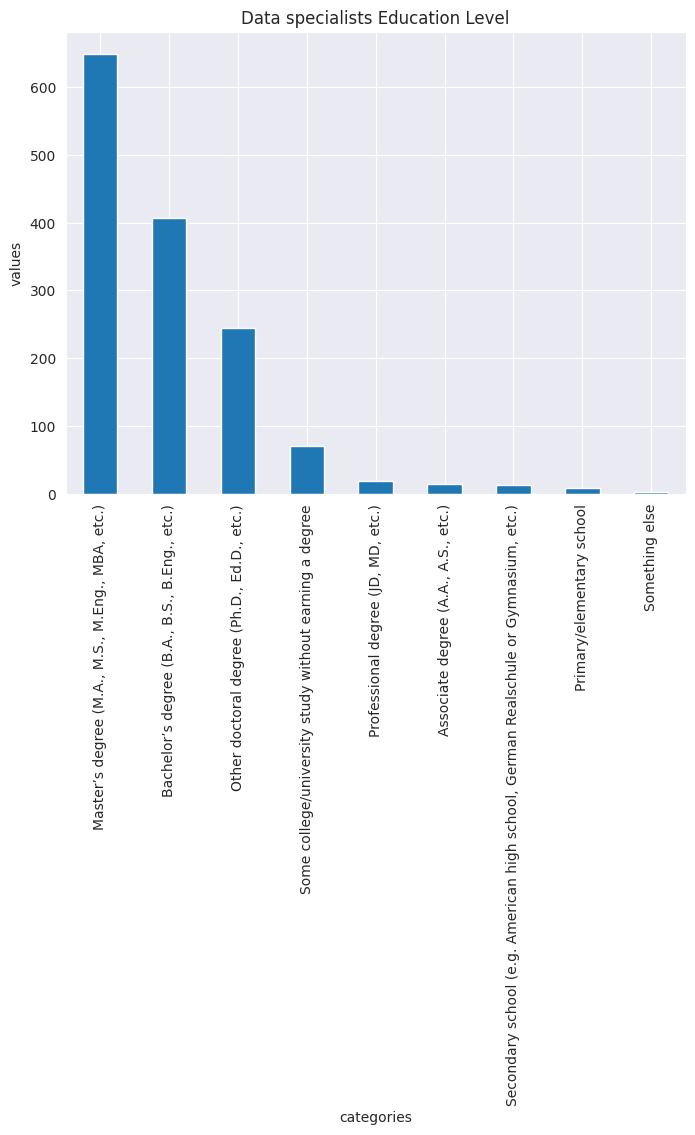

In [41]:
df["EdLevel"].value_counts().plot(kind = "bar")
plt.title('Data specialists Education Level')
plt.xlabel('categories')
plt.ylabel('values')